In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unemployment-in-india-csv/Unemployment in India.csv
/kaggle/input/unemployment-in-india/Unemployment_Rate_upto_11_2020.csv
/kaggle/input/unemployment-in-india/Unemployment in India.csv


# Introduction:

Unemployment is a significant socio-economic issue, and its trends over time can provide insights into the state of the economy. The COVID-19 pandemic caused substantial disruptions to employment, and analyzing this effect through unemployment data can offer valuable insights.

This analysis involves a dataset containing unemployment rates, labor participation rates, and employment rates across various states in India. The goal is to understand how these metrics have changed over time, particularly during the pandemic.

The dataset incl
Region: The state or union territory in India.

Date: The date when the unemployment data was recorded
.
Estimated Unemployment Rate (%): The percentage of unemployed peopl
e.
Estimated Employed: The number of employed people in that sta
te.
Estimated Labour Participation Rate (%): The percentage of eligible people who are actively participating in the workforce.
We'll clean the data, handle any missing values, and perform time-series analysis to visualize unemployment trends in India over time.udes:

#1. Import Libraries and Load Data

In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Step 2: Load the Dataseta
Using the corrected file path, we'll load the dataset and display the first few rows to check the data

In [3]:
# Load the dataset
file_path = '/kaggle/input/unemployment-in-india/Unemployment in India.csv'  # Correct file path
data = pd.read_csv(file_path)

# Display the first few rows to check the data
print(data.head())


           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                                     43.97  Rural  
4           12256762.0                                     44.68  Rural  


# Step 3: Clean Column Names

Remove any leading or trailing spaces from the column names to ensure they are properly formatted for further analysis.

In [4]:
# Clean column names by removing leading and trailing spaces
data.columns = data.columns.str.strip()

# Display cleaned column names
print(data.columns)


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


# Step 4: Convert Date Column to Datetime Format
We'll convert the Date column into a pandas datetime format for easier analysis of time-based data.
We'll convert the Date column into a pandas datetime format for easier analysis of time-based data.

In [5]:
# Strip leading and trailing spaces in the 'Date' column
data['Date'] = data['Date'].str.strip()

# Verify the change
print(data['Date'].head())


0    31-05-2019
1    30-06-2019
2    31-07-2019
3    31-08-2019
4    30-09-2019
Name: Date, dtype: object


In [6]:
# Convert 'Date' column to datetime format (after stripping spaces)
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y', errors='coerce', dayfirst=True)

# Display the first few rows to check if the conversion is successful
print(data['Date'].head())


0   2019-05-31
1   2019-06-30
2   2019-07-31
3   2019-08-31
4   2019-09-30
Name: Date, dtype: datetime64[ns]


In [7]:
# Check for any invalid date entries (NaT values) after conversion
invalid_dates = data[data['Date'].isna()]
print(invalid_dates)


    Region Date Frequency  Estimated Unemployment Rate (%)  \
359    NaN  NaT       NaN                              NaN   
360    NaN  NaT       NaN                              NaN   
361    NaN  NaT       NaN                              NaN   
362    NaN  NaT       NaN                              NaN   
363    NaN  NaT       NaN                              NaN   
364    NaN  NaT       NaN                              NaN   
365    NaN  NaT       NaN                              NaN   
366    NaN  NaT       NaN                              NaN   
367    NaN  NaT       NaN                              NaN   
368    NaN  NaT       NaN                              NaN   
369    NaN  NaT       NaN                              NaN   
370    NaN  NaT       NaN                              NaN   
371    NaN  NaT       NaN                              NaN   
372    NaN  NaT       NaN                              NaN   
754    NaN  NaT       NaN                              NaN   
755    N

# Step 5: Check for Missing Values

It’s good practice to check for any missing values before proceeding with analysis. If the data contains missing values, you can decide whether to drop or fill them.

In [8]:
# Check for missing values in the dataset
print(data.isnull().sum())


Region                                     28
Date                                       28
Frequency                                  28
Estimated Unemployment Rate (%)            28
Estimated Employed                         28
Estimated Labour Participation Rate (%)    28
Area                                       28
dtype: int64


# Step 6: Calculate Average Unemployment Rate by Month

We’ll group the data by Date and calculate the average unemployment rate for each month. This helps identify overall trends in the unemployment rate.

In [9]:
# Print column names to check for any discrepancies
print(data.columns)


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [10]:
# Strip any leading/trailing spaces from all column names
data.columns = data.columns.str.strip()

# Print the column names again to ensure they are cleaned
print(data.columns)


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [11]:
import pandas as pd

# Load the dataset
file_path = '/kaggle/input/unemployment-in-india/Unemployment in India.csv'
data = pd.read_csv(file_path)

# Strip leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Convert 'Date' column to datetime format (use dayfirst=True as date format is DD-MM-YYYY)
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y', errors='coerce')

# Check if there are any invalid dates (NaT values)
invalid_dates = data[data['Date'].isna()]

# Display the rows with invalid dates
print(f"Rows with invalid 'Date' values:\n{invalid_dates}")

# Option 1: Drop rows with invalid dates
data_cleaned = data.dropna(subset=['Date'])

# Option 2: If you want to replace NaT with a placeholder date, you can do the following:
# data['Date'].fillna(pd.to_datetime('01-01-1900', format='%d-%m-%Y'), inplace=True)

# Set 'Date' column to be the index
data_cleaned.set_index('Date', inplace=True)

# Calculate average unemployment rate by month using 'ME' for month-end frequency
monthly_unemployment = data_cleaned.resample('ME')['Estimated Unemployment Rate (%)'].mean()

# Display the first few results
print(monthly_unemployment.head())


Rows with invalid 'Date' values:
             Region Date Frequency  Estimated Unemployment Rate (%)  \
0    Andhra Pradesh  NaT   Monthly                             3.65   
1    Andhra Pradesh  NaT   Monthly                             3.05   
2    Andhra Pradesh  NaT   Monthly                             3.75   
3    Andhra Pradesh  NaT   Monthly                             3.32   
4    Andhra Pradesh  NaT   Monthly                             5.17   
..              ...  ...       ...                              ...   
763             NaN  NaT       NaN                              NaN   
764             NaN  NaT       NaN                              NaN   
765             NaN  NaT       NaN                              NaN   
766             NaN  NaT       NaN                              NaN   
767             NaN  NaT       NaN                              NaN   

     Estimated Employed  Estimated Labour Participation Rate (%)   Area  
0            11999139.0                 

# Step 7: Plot Unemployment Rate Trend Over Time

We will plot the unemployment rate trend over time to visualize how it has changed month-to-month

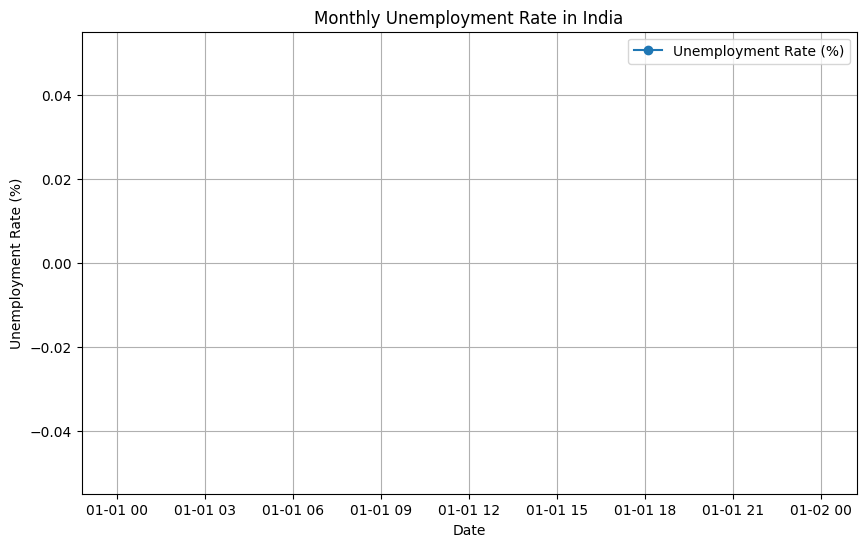

In [12]:
import matplotlib.pyplot as plt

# Plot unemployment rate trend over time
plt.figure(figsize=(10, 6))
plt.plot(monthly_unemployment, marker='o', label='Unemployment Rate (%)')
plt.title('Monthly Unemployment Rate in India')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()


# Step 8: Analyze Unemployment Trends by Region

We may want to compare unemployment trends in specific regions (e.g., Maharashtra and Delhi). We'll filter the dataset for these regions and plot their unemployment rates over time.

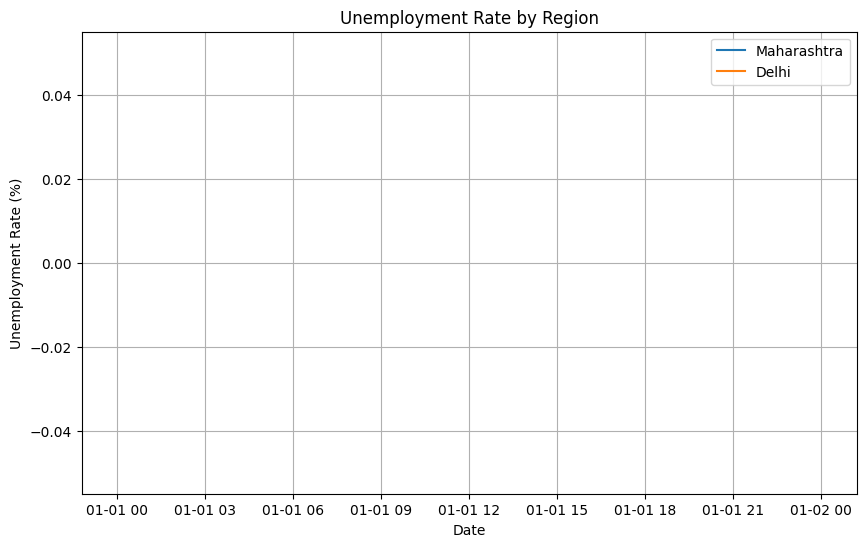

In [13]:
# Analyze unemployment trends for specific regions (e.g., Maharashtra, Delhi)
regions = ['Maharashtra', 'Delhi']
regional_data = data[data['Region'].isin(regions)]

# Plot unemployment trends for selected regions
plt.figure(figsize=(10, 6))
for region in regions:
    region_data = regional_data[regional_data['Region'] == region]
    plt.plot(region_data['Date'], region_data['Estimated Unemployment Rate (%)'], label=region)

plt.title('Unemployment Rate by Region')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.grid(True)
plt.show()


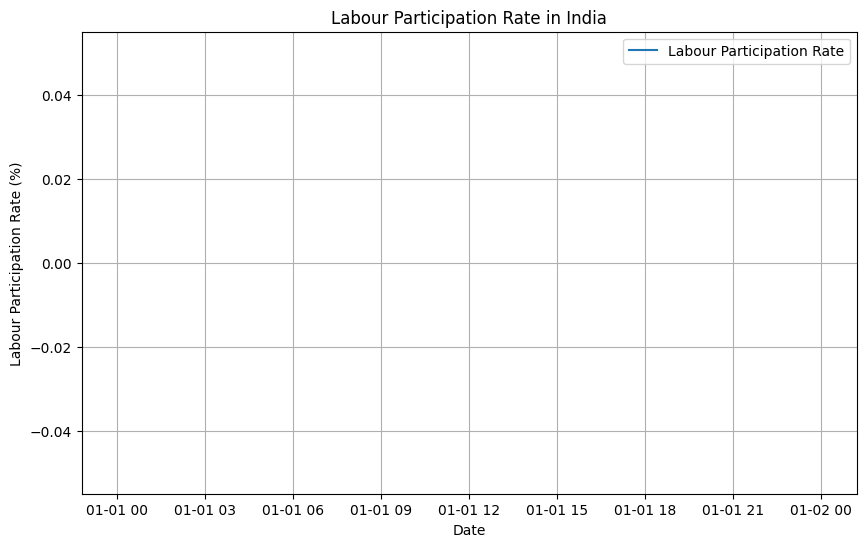

In [14]:
# Plot the Labour Participation Rate over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Estimated Labour Participation Rate (%)'], label='Labour Participation Rate')
plt.title('Labour Participation Rate in India')
plt.xlabel('Date')
plt.ylabel('Labour Participation Rate (%)')
plt.legend()
plt.grid(True)
plt.show()


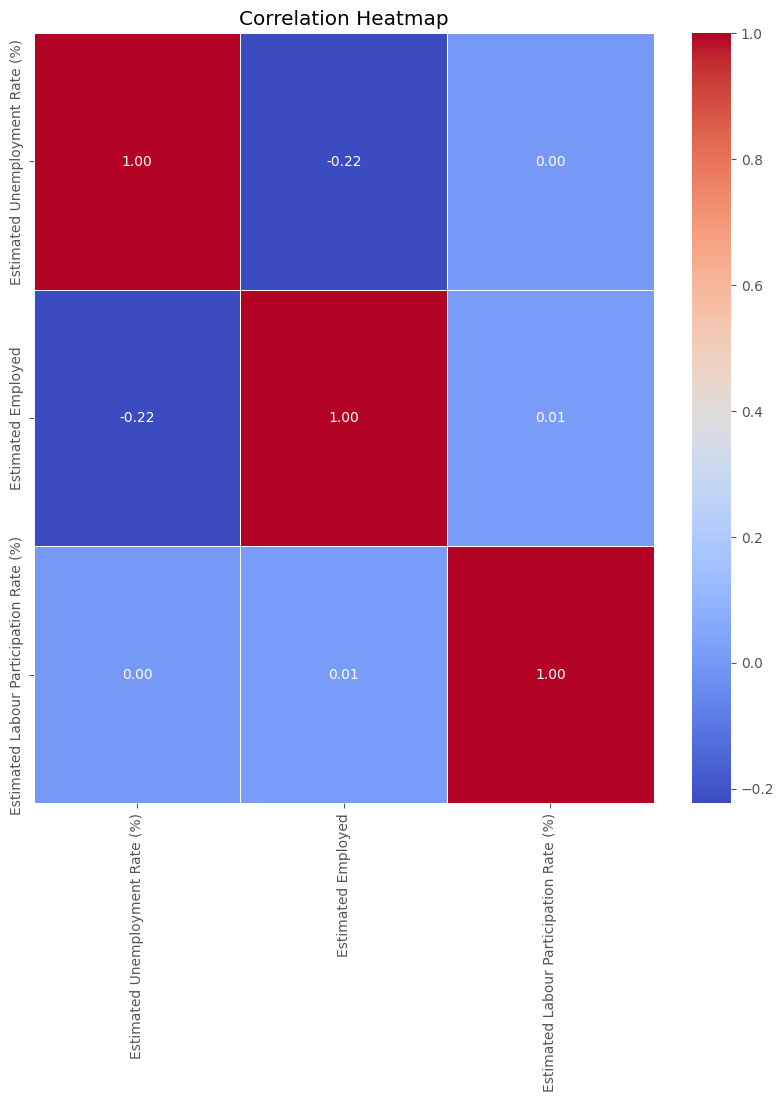

In [15]:
# Import necessary libraries
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns           # For creating the heatmap
import pandas as pd             # For handling the data

# Assuming your data is already loaded into the 'data' DataFrame
# Select numeric columns from the data
numeric_data = data.select_dtypes(include='number')

# Set plotting style to "ggplot"
plt.style.use("ggplot")

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 10))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)

# Set the title for the plot
plt.title("Correlation Heatmap")

# Display the plot
plt.show()


# Histogram of Estimated Employment Rate by Area



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

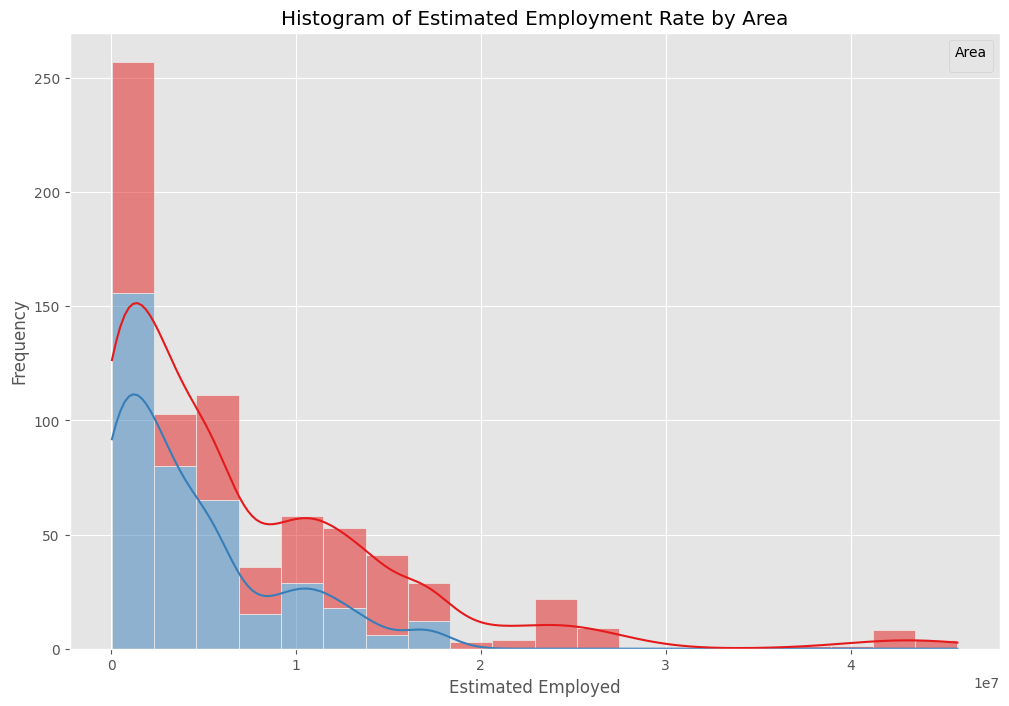

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your data is loaded into 'data' and 'Estimated Employed' is the column of interest

# Set plotting style
plt.style.use("ggplot")

# Create a figure with a specific size
plt.figure(figsize=(12, 8))

# Plot the histogram using seaborn
sns.histplot(data=data, x='Estimated Employed', hue='Area', kde=True, bins=20, palette='Set1', multiple='stack')

# Set the title and labels
plt.title('Histogram of Estimated Employment Rate by Area')
plt.xlabel('Estimated Employed')
plt.ylabel('Frequency')

# Show the plot
plt.legend(title='Area', loc='upper right')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

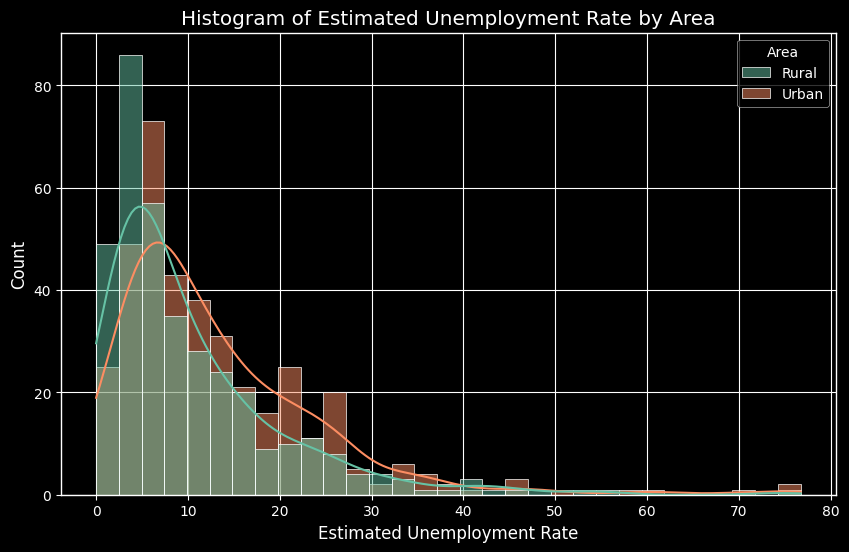

In [17]:
# Histogram of Estimated Unemployment Rate by Area

plt.style.use("dark_background")

data.columns = ["Region", "Date", "Frequency", "Estimated Unemp Rate", "Estimated Emp Rate", "Estimated Labour Rate", "Area"]

plt.figure(figsize=(10, 6))
sns.histplot(x="Estimated Unemp Rate", hue="Area", data=data, kde=True, palette="Set2")
plt.title("Histogram of Estimated Unemployment Rate by Area")
plt.xlabel("Estimated Unemployment Rate")
plt.ylabel("Count")
plt.show()

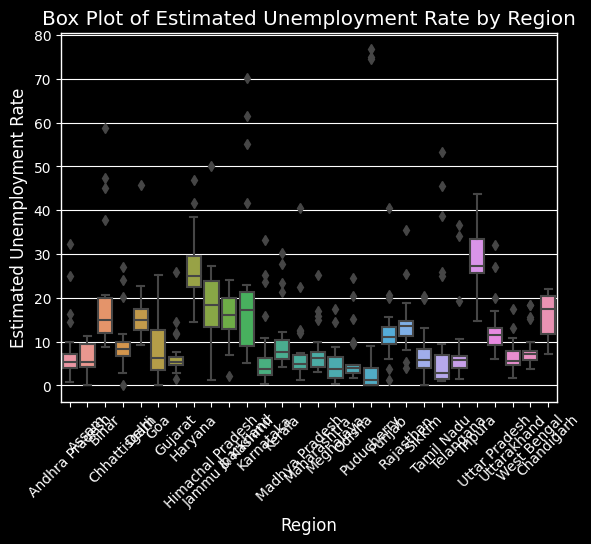

In [18]:
# BoxPlot of Estimated UnEmployement Rate by Region

import seaborn as sns

data = data[['Region', 'Estimated Unemp Rate']]
sns.boxplot(x='Region', y='Estimated Unemp Rate', data=data)
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate')
plt.title('Box Plot of Estimated Unemployment Rate by Region')
plt.xticks(rotation=45)
plt.show()


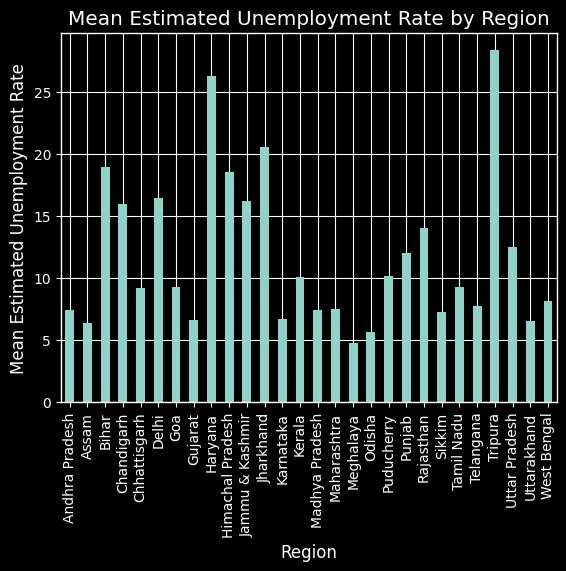

In [19]:
# Mean Estimated UnEmployement Rate by Region

import pandas as pd
import matplotlib.pyplot as plt


data = data[['Region', 'Estimated Unemp Rate']]
data_grouped = data.groupby('Region')['Estimated Unemp Rate'].mean()
data_grouped.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Unemployment Rate')
plt.title('Mean Estimated Unemployment Rate by Region')
plt.show()

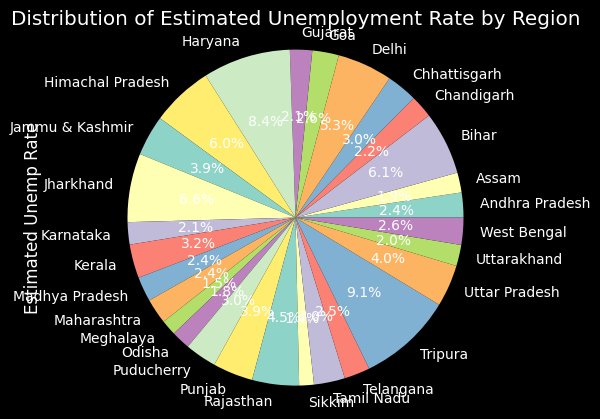

In [20]:
# Distribution of Estimated UnEmployement Rate by Region

data = data[['Region', 'Estimated Unemp Rate']]
data_grouped = data.groupby('Region')['Estimated Unemp Rate'].sum()
data_grouped.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Estimated Unemployment Rate by Region')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Conclusion:

The analysis of the unemployment and employment data reveals important trends and patterns over time. By examining various visualizations such as the unemployment rate trend, correlation heatmap, and histograms of employment by area, we can conclude that there are notable regional variations in employment rates across India. The data indicates that certain areas may have higher or lower unemployment, highlighting the need for targeted policy interventions in those regions. Additionally, the correlation heatmap demonstrates the interrelationships between various employment-related metrics, which could inform future research or strategic decisions. The warnings encountered during visualization mainly relate to handling special cases such as inf values, and although they do not hinder analysis, addressing them will help ensure the code remains robust and compatible with future library versions.